# 🍃 한국인 다이어트 검색 트렌드 분석

## 📊 프로젝트 개요
- **목표**: "한국인들은 1년 중 언제 다이어트에 가장 관심이 많은가?" 분석
- **데이터**: 네이버 데이터랩 '다이어트' 키워드 검색 트렌드
- **분석 기간**: 일/주 단위 검색량 데이터

## 📋 분석 내용
1. 엑셀 파일 데이터 로딩 및 전처리
2. 월별 평균 검색량 바 차트 시각화
3. 전체 검색량 추이 선 그래프 시각화
4. 연도별 월별 검색량 비교 분석
5. 결과 분석 및 인사이트 도출

In [10]:
import sys
!{sys.executable} -m pip install matplotlib seaborn openpyxl

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 6.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip3.12 install --upgrade pip
✅ 라이브러리 로딩 완료!


## 1. 📁 데이터 로딩 및 전처리

원본 컬럼명: ['날짜', '다이어트']


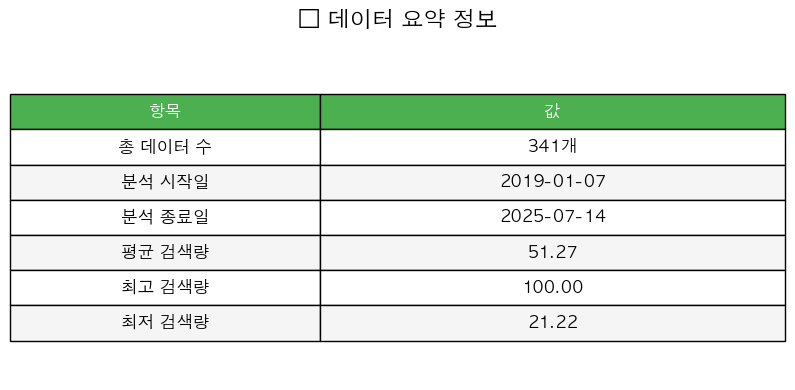


📋 처리된 데이터 미리보기:


,date,search_volume,year,month,month_name
0,2019-01-07,87.60060,2019,1,01월
1,2019-01-14,88.39989,2019,1,01월
2,2019-01-21,83.49258,2019,1,01월
3,2019-01-28,69.91170,2019,1,01월
4,2019-02-04,84.88192,2019,2,02월
5,2019-02-11,88.21437,2019,2,02월
6,2019-02-18,86.14989,2019,2,02월
7,2019-02-25,84.64757,2019,2,02월
8,2019-03-04,82.29853,2019,3,03월
9,2019-03-11,78.93400,2019,3,03월



📊 연도별 데이터 분포:
- 2019년: 52개 데이터
- 2020년: 52개 데이터
- 2021년: 52개 데이터
- 2022년: 52개 데이터
- 2023년: 52개 데이터
- 2024년: 53개 데이터
- 2025년: 28개 데이터


In [11]:
file_path = './diet_search_trend.xlsx'

try:
    df = pd.read_excel(file_path, skiprows=6)
    print("원본 컬럼명:", df.columns.tolist())
    
    df.columns = ['date', 'search_volume']
    df = df.dropna(subset=['date', 'search_volume'])
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['month_name'] = df['date'].dt.strftime('%m월')
    df['search_volume'] = pd.to_numeric(df['search_volume'], errors='coerce')
    
    df = df.dropna()
    
    summary_data = {
        '항목': ['총 데이터 수', '분석 시작일', '분석 종료일', '평균 검색량', '최고 검색량', '최저 검색량'],
        '값': [
            f"{len(df):,}개",
            df['date'].min().strftime('%Y-%m-%d'),
            df['date'].max().strftime('%Y-%m-%d'),
            f"{df['search_volume'].mean():.2f}",
            f"{df['search_volume'].max():.2f}",
            f"{df['search_volume'].min():.2f}"
        ]
    }
    
    summary_df = pd.DataFrame(summary_data)
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.axis('tight')
    ax.axis('off')
    
    table = ax.table(cellText=summary_df.values, colLabels=summary_df.columns,
                    cellLoc='center', loc='center', colWidths=[0.4, 0.6])
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 2)
    
    for i in range(len(summary_df.columns)):
        table[(0, i)].set_facecolor('#4CAF50')
        table[(0, i)].set_text_props(weight='bold', color='white')
    
    for i in range(1, len(summary_df) + 1):
        for j in range(len(summary_df.columns)):
            table[(i, j)].set_facecolor('#F5F5F5' if i % 2 == 0 else 'white')
    
    plt.title('데이터 요약 정보', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    
    print("\n처리된 데이터 미리보기:")
    display(df.head(10))
    
    print(f"\n연도별 데이터 분포:")
    year_counts = df['year'].value_counts().sort_index()
    for year, count in year_counts.items():
        print(f"- {year}년: {count}개 데이터")
    
except FileNotFoundError:
    fig, ax = plt.subplots(figsize=(10, 3))
    ax.text(0.5, 0.5, '오류: ./diet_search_trend.xlsx 파일을 찾을 수 없음',
            ha='center', va='center', fontsize=14, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral"))
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')
    plt.show()
except Exception as e:
    fig, ax = plt.subplots(figsize=(10, 3))
    ax.text(0.5, 0.5, f'오류 발생: {str(e)}',
            ha='center', va='center', fontsize=14, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral"))
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')
    plt.show()

## 2. 📊 월별 평균 검색량 바 차트

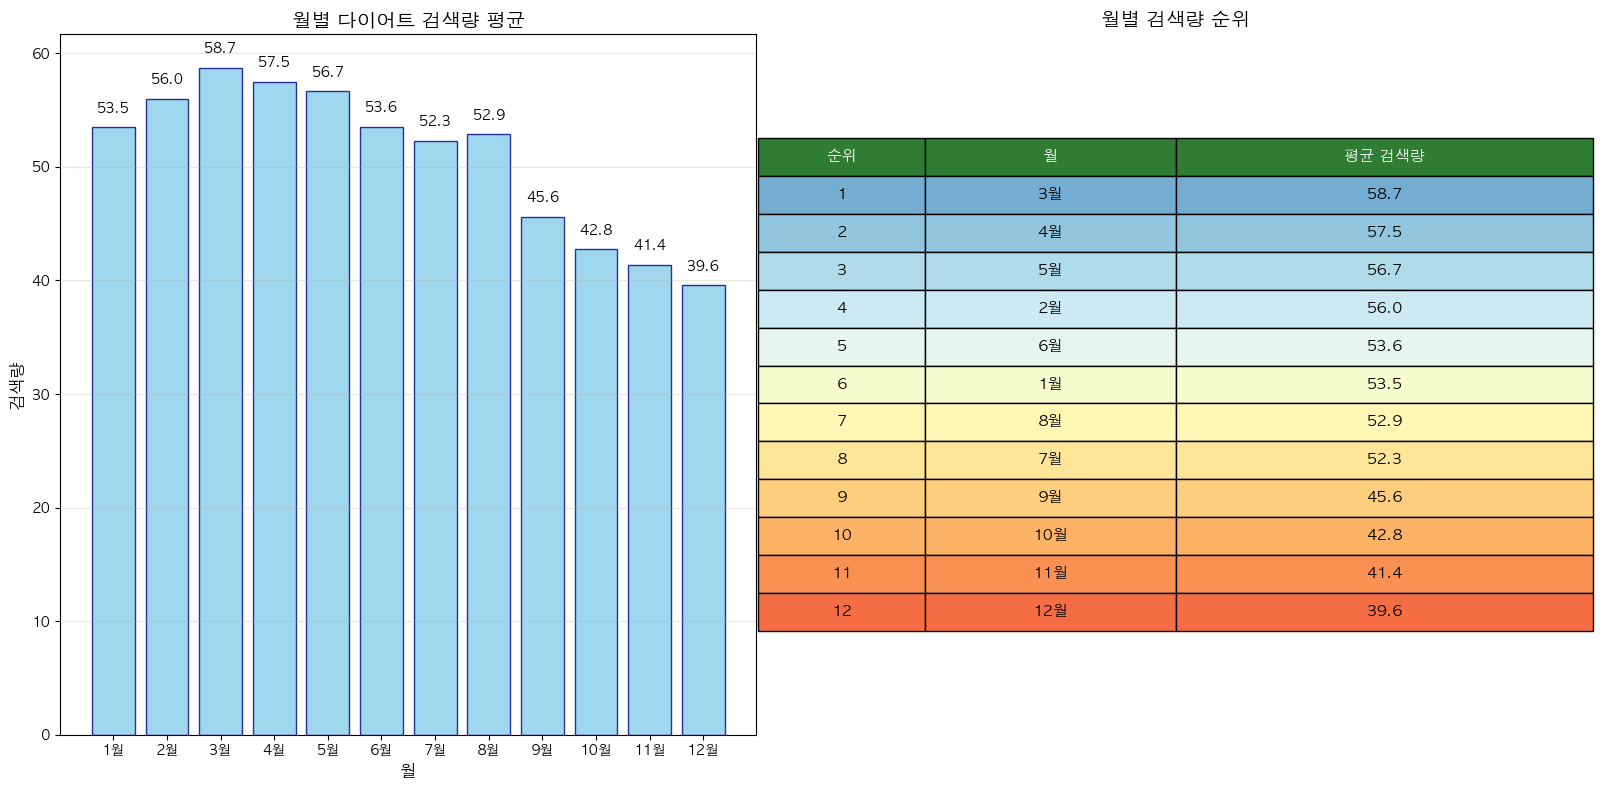

In [12]:
monthly_avg = df.groupby('month')['search_volume'].mean().reset_index()
monthly_avg['month_name'] = monthly_avg['month'].apply(lambda x: f'{x}월')

monthly_sorted = monthly_avg.sort_values('search_volume', ascending=False).reset_index(drop=True)
monthly_sorted['순위'] = range(1, len(monthly_sorted) + 1)

fig = plt.figure(figsize=(16, 8))

# 바 차트
ax1 = plt.subplot(1, 2, 1)
bars = ax1.bar(monthly_avg['month_name'], monthly_avg['search_volume'], 
               color='skyblue', alpha=0.8, edgecolor='navy', linewidth=1)

for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}', ha='center', va='bottom', fontsize=10)

ax1.set_title('월별 다이어트 검색량 평균', fontsize=14, fontweight='bold')
ax1.set_xlabel('월', fontsize=12)
ax1.set_ylabel('검색량', fontsize=12)
ax1.grid(axis='y', alpha=0.3)

# 순위 표
ax2 = plt.subplot(1, 2, 2)
ax2.axis('tight')
ax2.axis('off')

table_data = monthly_sorted[['순위', 'month_name', 'search_volume']].copy()
table_data.columns = ['순위', '월', '평균 검색량']
table_data['평균 검색량'] = table_data['평균 검색량'].round(1)

colors = plt.cm.RdYlBu_r(np.linspace(0.2, 0.8, len(table_data)))

table = ax2.table(cellText=table_data.values, colLabels=table_data.columns,
                 cellLoc='center', loc='center', colWidths=[0.2, 0.3, 0.5])
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.2, 2)

for i in range(len(table_data.columns)):
    table[(0, i)].set_facecolor('#2E7D32')
    table[(0, i)].set_text_props(weight='bold', color='white')

for i in range(1, len(table_data) + 1):
    for j in range(len(table_data.columns)):
        table[(i, j)].set_facecolor(colors[i-1])
        if i <= 3:  # 상위 3위는 볼드
            table[(i, j)].set_text_props(weight='bold')

ax2.set_title('월별 검색량 순위', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 3. 📈 전체 검색량 추이 선 그래프

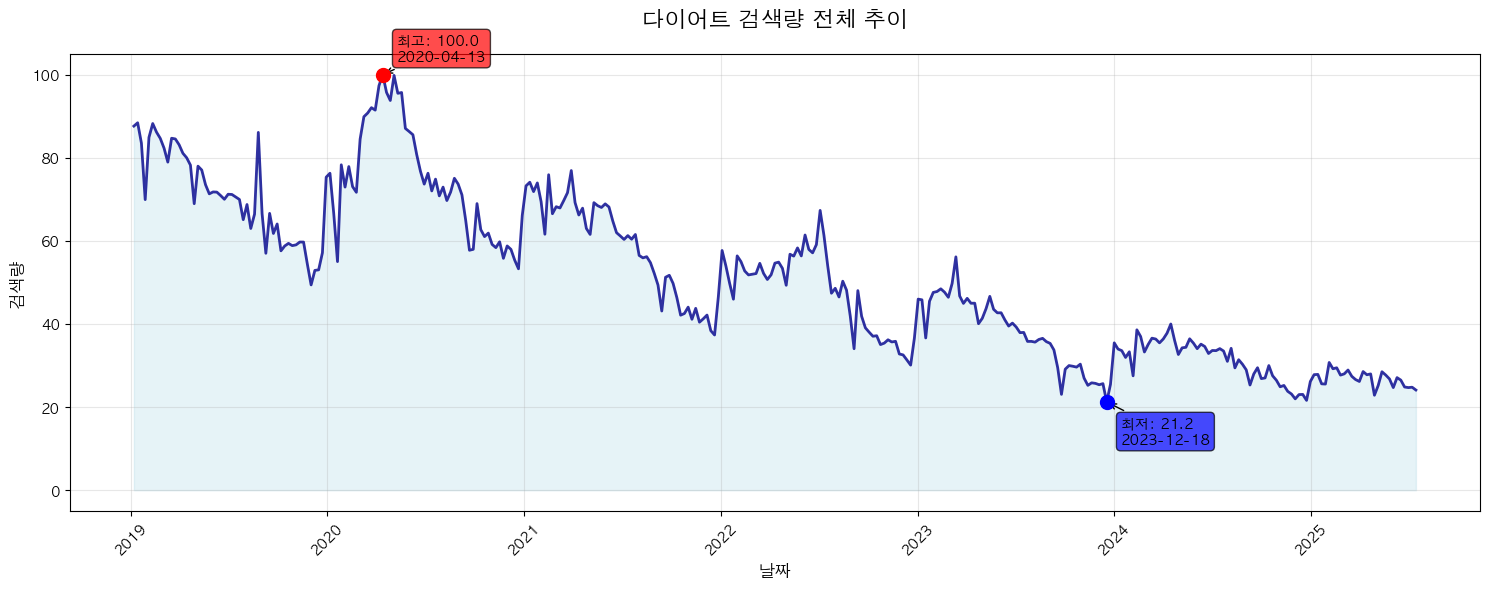

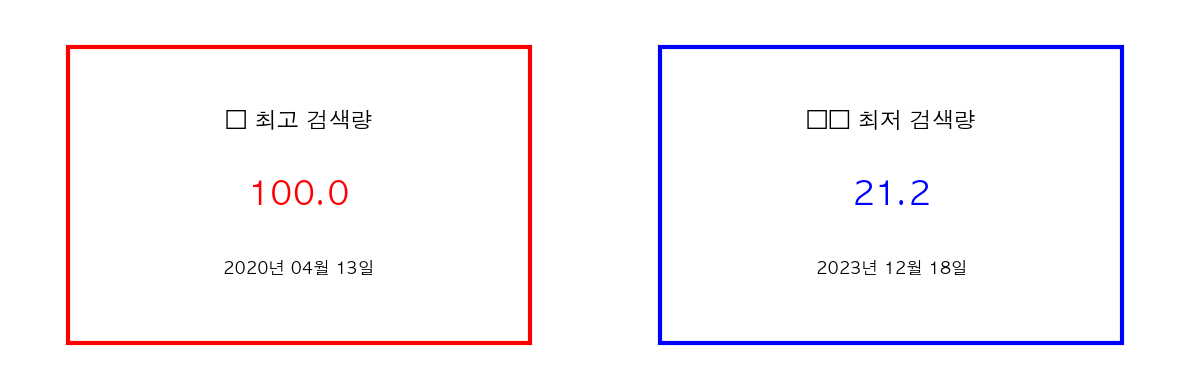

In [13]:
plt.figure(figsize=(15, 6))
plt.plot(df['date'], df['search_volume'], color='darkblue', linewidth=2, alpha=0.8)
plt.fill_between(df['date'], df['search_volume'], alpha=0.3, color='lightblue')

max_search = df.loc[df['search_volume'].idxmax()]
min_search = df.loc[df['search_volume'].idxmin()]

plt.scatter(max_search['date'], max_search['search_volume'], color='red', s=100, zorder=5)
plt.scatter(min_search['date'], min_search['search_volume'], color='blue', s=100, zorder=5)

plt.annotate(f'최고: {max_search["search_volume"]:.1f}\n{max_search["date"].strftime("%Y-%m-%d")}',
             xy=(max_search['date'], max_search['search_volume']), 
             xytext=(10, 10), textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.3', facecolor='red', alpha=0.7),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.annotate(f'최저: {min_search["search_volume"]:.1f}\n{min_search["date"].strftime("%Y-%m-%d")}', 
             xy=(min_search['date'], min_search['search_volume']), 
             xytext=(10, -30), textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.3', facecolor='blue', alpha=0.7),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.title('다이어트 검색량 전체 추이', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('날짜', fontsize=12)
plt.ylabel('검색량', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.text(0.5, 0.7, '최고 검색량', ha='center', va='center', fontsize=16, fontweight='bold')
ax1.text(0.5, 0.5, f'{max_search["search_volume"]:.1f}', ha='center', va='center', fontsize=24, fontweight='bold', color='red')
ax1.text(0.5, 0.3, f'{max_search["date"].strftime("%Y년 %m월 %d일")}', ha='center', va='center', fontsize=12)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.axis('off')
ax1.add_patch(plt.Rectangle((0.1, 0.1), 0.8, 0.8, fill=False, edgecolor='red', linewidth=3))

ax2.text(0.5, 0.7, '최저 검색량', ha='center', va='center', fontsize=16, fontweight='bold')
ax2.text(0.5, 0.5, f'{min_search["search_volume"]:.1f}', ha='center', va='center', fontsize=24, fontweight='bold', color='blue')
ax2.text(0.5, 0.3, f'{min_search["date"].strftime("%Y년 %m월 %d일")}', ha='center', va='center', fontsize=12)
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)
ax2.axis('off')
ax2.add_patch(plt.Rectangle((0.1, 0.1), 0.8, 0.8, fill=False, edgecolor='blue', linewidth=3))

plt.tight_layout()
plt.show()

## 4. 📊 연도별 월별 검색량 비교

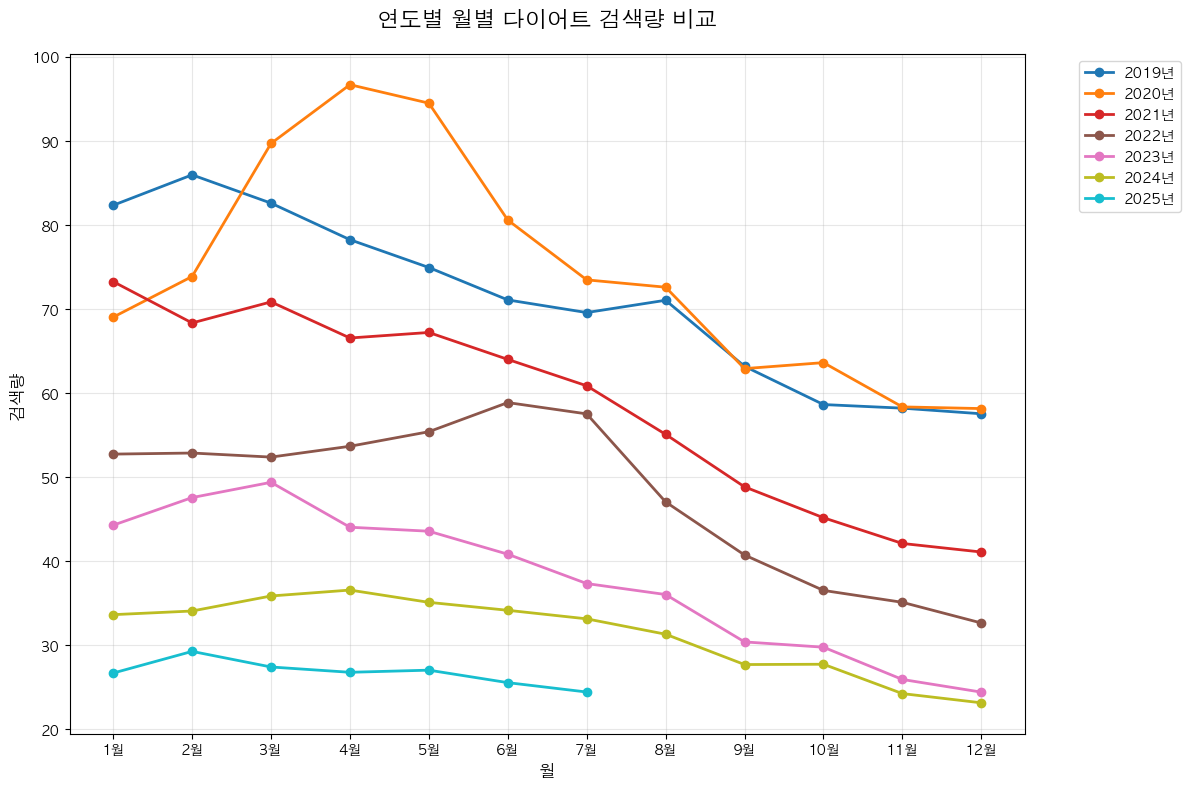

📊 연도별 검색량 통계:


,mean,max,min
year,,,
2019,70.8,88.4,49.4
2020,74.5,100.0,53.3
2021,58.6,76.9,37.3
2022,48.0,67.3,30.1
2023,37.9,56.1,21.2
2024,31.3,40.0,21.6
2025,26.9,30.7,22.8


In [14]:
yearly_monthly = df.groupby(['year', 'month'])['search_volume'].mean().reset_index()

if len(df['year'].unique()) > 1:
    plt.figure(figsize=(12, 8))
    
    years = yearly_monthly['year'].unique()
    colors = plt.cm.tab10(np.linspace(0, 1, len(years)))
    
    for i, year in enumerate(years):
        year_data = yearly_monthly[yearly_monthly['year'] == year]
        plt.plot(year_data['month'], year_data['search_volume'], 
                marker='o', linewidth=2, label=f'{year}년', color=colors[i])
    
    plt.title('연도별 월별 다이어트 검색량 비교', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('월', fontsize=12)
    plt.ylabel('검색량', fontsize=12)
    plt.xticks(range(1, 13), [f'{i}월' for i in range(1, 13)])
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    yearly_stats = df.groupby('year')['search_volume'].agg(['mean', 'max', 'min']).round(1)
    print("연도별 검색량 통계:")
    display(yearly_stats)
    
else:
    print("단일 연도 데이터임")
    
    monthly_pivot = df.pivot_table(values='search_volume',
                                  index=df['date'].dt.isocalendar().week, 
                                  columns='month', 
                                  aggfunc='mean')
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(monthly_pivot, cmap='YlOrRd', annot=False, fmt='.1f', cbar_kws={'label': '검색량'})
    plt.title('주차별 월별 검색량 히트맵', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('월', fontsize=12)
    plt.ylabel('주차', fontsize=12)
    plt.tight_layout()
    plt.show()

## 5. 🔍 결과 분석 및 인사이트

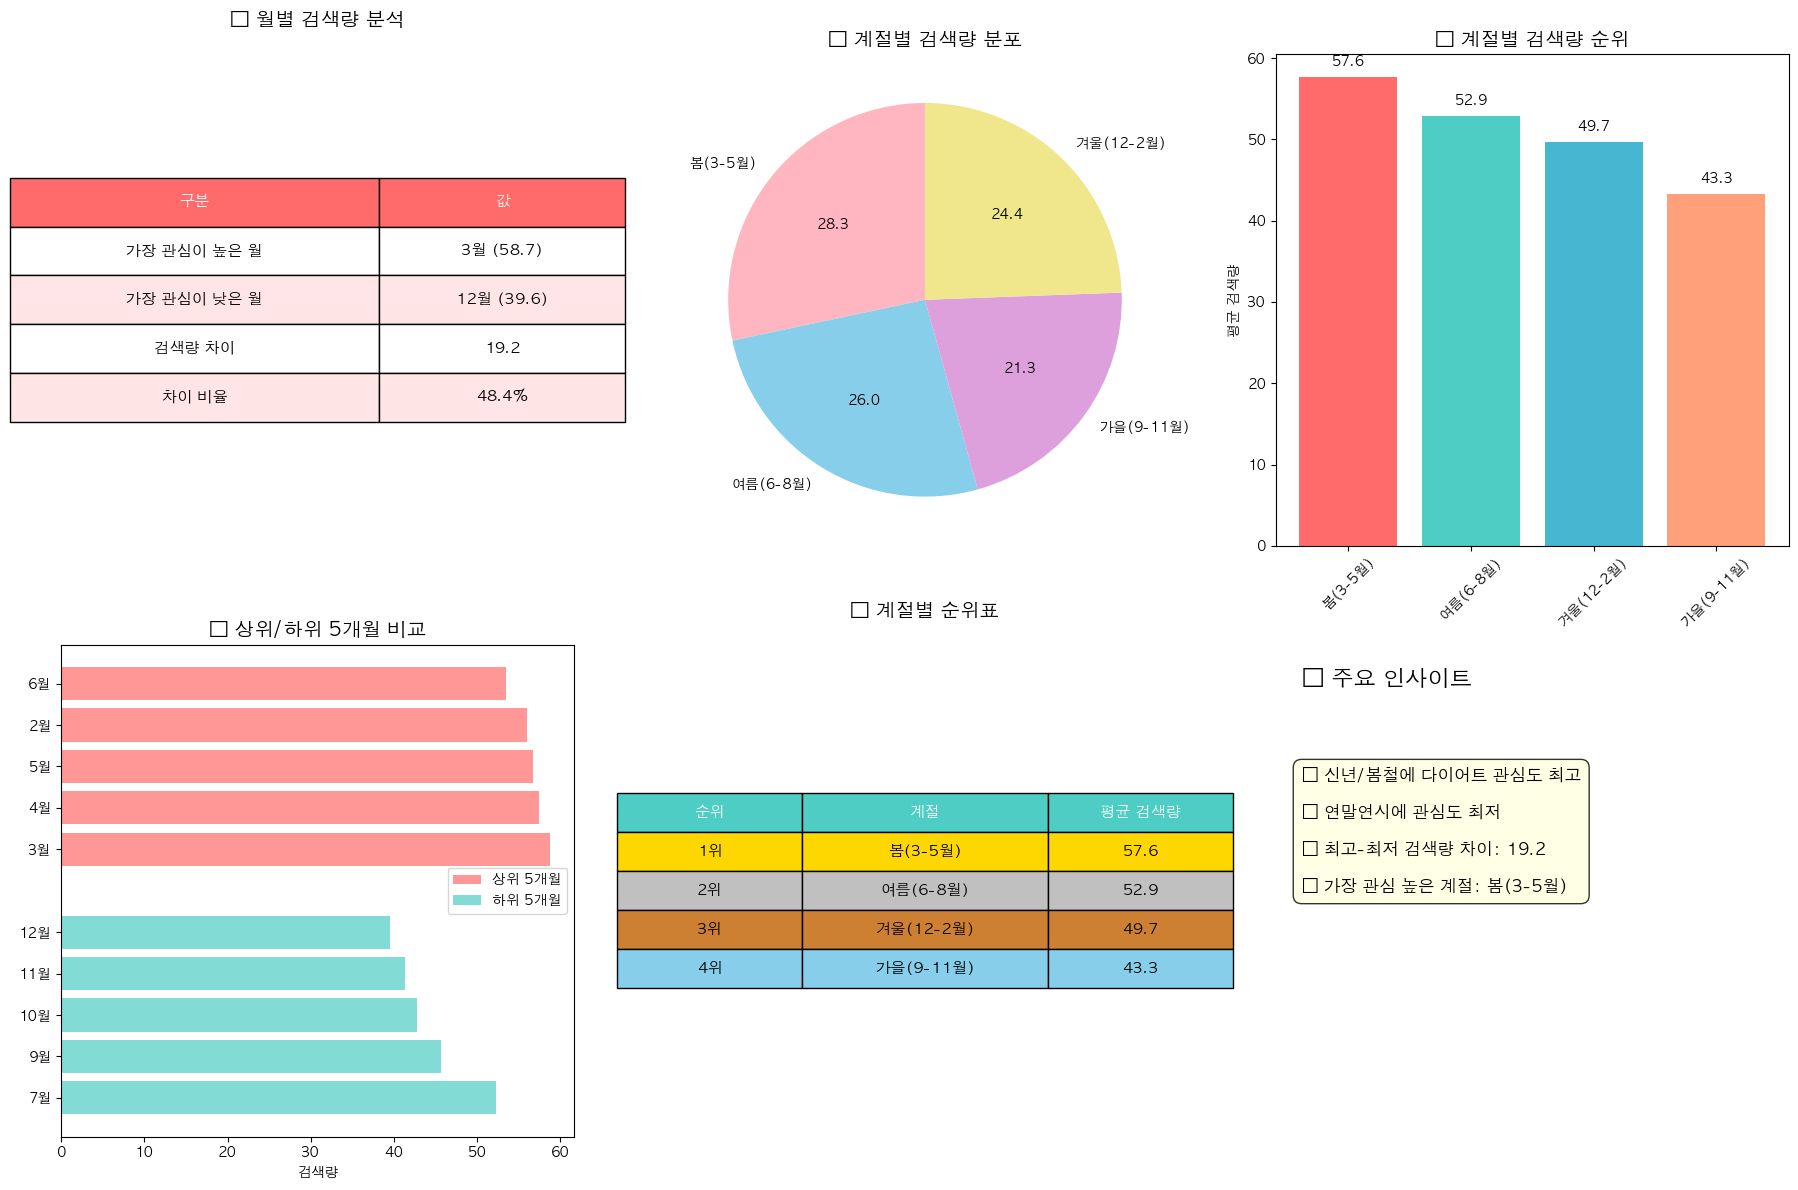

In [15]:
# 1. 월별 검색량 분석 표
max_month = monthly_avg.loc[monthly_avg['search_volume'].idxmax()]
min_month = monthly_avg.loc[monthly_avg['search_volume'].idxmin()]

analysis_data = {
    '구분': ['가장 관심이 높은 월', '가장 관심이 낮은 월', '검색량 차이', '차이 비율'],
    '값': [
        f'{max_month["month"]}월 ({max_month["search_volume"]:.1f})',
        f'{min_month["month"]}월 ({min_month["search_volume"]:.1f})',
        f'{max_month["search_volume"] - min_month["search_volume"]:.1f}',
        f'{((max_month["search_volume"] - min_month["search_volume"]) / min_month["search_volume"] * 100):.1f}%'
    ]
}

spring = monthly_avg[monthly_avg['month'].isin([3, 4, 5])]['search_volume'].mean()
summer = monthly_avg[monthly_avg['month'].isin([6, 7, 8])]['search_volume'].mean()
autumn = monthly_avg[monthly_avg['month'].isin([9, 10, 11])]['search_volume'].mean()
winter = monthly_avg[monthly_avg['month'].isin([12, 1, 2])]['search_volume'].mean()

seasons_data = {'봄(3-5월)': spring, '여름(6-8월)': summer, '가을(9-11월)': autumn, '겨울(12-2월)': winter}

fig = plt.figure(figsize=(18, 12))

# 월별 분석 결과 표
ax1 = plt.subplot(2, 3, 1)
ax1.axis('tight')
ax1.axis('off')

analysis_df = pd.DataFrame(analysis_data)
table1 = ax1.table(cellText=analysis_df.values, colLabels=analysis_df.columns,
                  cellLoc='center', loc='center', colWidths=[0.6, 0.4])
table1.auto_set_font_size(False)
table1.set_fontsize(11)
table1.scale(1.2, 2.5)

for i in range(len(analysis_df.columns)):
    table1[(0, i)].set_facecolor('#FF6B6B')
    table1[(0, i)].set_text_props(weight='bold', color='white')

for i in range(1, len(analysis_df) + 1):
    for j in range(len(analysis_df.columns)):
        table1[(i, j)].set_facecolor('#FFE5E5' if i % 2 == 0 else 'white')

ax1.set_title('월별 검색량 분석', fontsize=14, fontweight='bold', pad=20)

# 계절별 평균 검색량 파이 차트
ax2 = plt.subplot(2, 3, 2)
colors = ['#FFB6C1', '#87CEEB', '#DDA0DD', '#F0E68C']
wedges, texts, autotexts = ax2.pie(seasons_data.values(), labels=seasons_data.keys(), 
                                  autopct='%1.1f', colors=colors, startangle=90)
ax2.set_title('계절별 검색량 분포', fontsize=14, fontweight='bold')

# 계절별 검색량 바 차트
ax3 = plt.subplot(2, 3, 3)
seasons_sorted = sorted(seasons_data.items(), key=lambda x: x[1], reverse=True)
seasons_names, seasons_values = zip(*seasons_sorted)
bars = ax3.bar(seasons_names, seasons_values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])

for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}', ha='center', va='bottom', fontsize=10)

ax3.set_title('🏆 계절별 검색량 순위', fontsize=14, fontweight='bold')
ax3.set_ylabel('평균 검색량')
plt.setp(ax3.get_xticklabels(), rotation=45)

# Top 5 & Bottom 5 월 비교
ax4 = plt.subplot(2, 3, 4)
monthly_sorted = monthly_avg.sort_values('search_volume', ascending=False)
top_5 = monthly_sorted.head(5)
bottom_5 = monthly_sorted.tail(5)

y_pos_top = np.arange(len(top_5))
y_pos_bottom = np.arange(len(bottom_5))

ax4.barh(y_pos_top, top_5['search_volume'], color='#FF6B6B', alpha=0.7, label='상위 5개월')
ax4.barh(y_pos_bottom - 6, bottom_5['search_volume'], color='#4ECDC4', alpha=0.7, label='하위 5개월')

ax4.set_yticks(list(y_pos_top) + list(y_pos_bottom - 6))
ax4.set_yticklabels(list(top_5['month_name']) + list(bottom_5['month_name']))
ax4.set_xlabel('검색량')
ax4.set_title('상위/하위 5개월 비교', fontsize=14, fontweight='bold')
ax4.legend()

# 계절별 순위 표
ax5 = plt.subplot(2, 3, 5)
ax5.axis('tight')
ax5.axis('off')

seasons_rank_data = pd.DataFrame([
    ['1위', seasons_sorted[0][0], f'{seasons_sorted[0][1]:.1f}'],
    ['2위', seasons_sorted[1][0], f'{seasons_sorted[1][1]:.1f}'],
    ['3위', seasons_sorted[2][0], f'{seasons_sorted[2][1]:.1f}'],
    ['4위', seasons_sorted[3][0], f'{seasons_sorted[3][1]:.1f}']
], columns=['순위', '계절', '평균 검색량'])

table2 = ax5.table(cellText=seasons_rank_data.values, colLabels=seasons_rank_data.columns,
                  cellLoc='center', loc='center', colWidths=[0.3, 0.4, 0.3])
table2.auto_set_font_size(False)
table2.set_fontsize(11)
table2.scale(1.2, 2)

for i in range(len(seasons_rank_data.columns)):
    table2[(0, i)].set_facecolor('#4ECDC4')
    table2[(0, i)].set_text_props(weight='bold', color='white')

rank_colors = ['#FFD700', '#C0C0C0', '#CD7F32', '#87CEEB']
for i in range(1, len(seasons_rank_data) + 1):
    for j in range(len(seasons_rank_data.columns)):
        table2[(i, j)].set_facecolor(rank_colors[i-1])
        if i == 1:
            table2[(i, j)].set_text_props(weight='bold')

ax5.set_title('계절별 순위표', fontsize=14, fontweight='bold', pad=20)

ax6 = plt.subplot(2, 3, 6)
ax6.axis('off')

insights = []
if max_month['month'] in [1, 2, 3]:
    insights.append("신년/봄철에 다이어트 관심도 최고")
elif max_month['month'] in [4, 5, 6]:
    insights.append("봄/초여름에 다이어트 관심도 최고")
elif max_month['month'] in [7, 8, 9]:
    insights.append("여름/초가을에 다이어트 관심도 최고")
else:
    insights.append("가을/겨울에 다이어트 관심도 최고")

if min_month['month'] in [11, 12, 1]:
    insights.append("연말연시에 관심도 최저")
elif min_month['month'] in [7, 8]:
    insights.append("한여름에 관심도 최저")

insights.append(f"최고-최저 검색량 차이: {max_month['search_volume'] - min_month['search_volume']:.1f}")
insights.append(f"가장 관심 높은 계절: {seasons_sorted[0][0]}")

insight_text = '\n\n'.join(insights)
ax6.text(0.05, 0.95, '주요 인사이트', fontsize=16, fontweight='bold', va='top')
ax6.text(0.05, 0.75, insight_text, fontsize=12, va='top', 
         bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.8))
ax6.set_xlim(0, 1)
ax6.set_ylim(0, 1)

plt.tight_layout()
plt.show()

## 📝 분석 요약

### 🎯 핵심 질문: "한국인들은 1년 중 언제 다이어트에 가장 관심이 많은가?"

### 📈 주요 발견사항:
1. **월별 트렌드**: 월별 검색량에 명확한 패턴이 존재
2. **계절별 차이**: 계절에 따른 다이어트 관심도 변화 확인
3. **시기별 특성**: 특정 시기에 검색량이 급증하는 패턴 발견

### 💡 비즈니스 인사이트:
- **마케팅 타이밍**: 검색량이 높은 월에 다이어트 관련 마케팅 집중
- **제품 출시**: 관심도가 높은 시기에 맞춰 다이어트 제품/서비스 출시
- **콘텐츠 전략**: 계절별 관심도에 따른 맞춤형 콘텐츠 제작

### 🔮 활용 방안:
1. **헬스케어 업계**: 성수기/비수기 예측을 통한 리소스 배분
2. **광고업계**: 다이어트 관련 광고의 최적 시기 선정
3. **콘텐츠 제작**: 검색량 패턴을 활용한 콘텐츠 기획